In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rc("font", family="Arial")
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from pylab import *

import numpy as np
import pyemma
import pytraj as pt
import mdtraj as md

import pickle
import seaborn as sns

from pyemma.util.contexts import settings
from glob import glob

## Loading data

In [2]:
rf0=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot0.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot0.parm7')

rf1=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot1.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot1.parm7')

rf2=pt.load('../1-Trajectories/0-Parm_rst//closed6_dry_rot2.rst7',
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot2.parm7')

rf3=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot3.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot3.parm7')

rf4=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot4.rst7',
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot4.parm7')

rf5=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot5.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot5.parm7')

rfopen=pt.load('../1-Trajectories/0-Parm_rst/open10_dry.rst7',
               '../1-Trajectories/0-Parm_rst/open10_dry.parm7')

In [3]:
indir1 = '../1-Trajectories/2-NoEq_with_IPA'
indir2 = '../1-Trajectories/4-Adaptive_sampling_with_IPA'
topfile = '../1-Trajectories/0-Parm_rst/open10_dry.parm7'

traj_list1 = sorted(glob(indir1+'/*.nc'))
traj_list2 = sorted(glob(indir2+'/*.nc'))

traj_list=traj_list1+traj_list2
traj_list

['../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_01.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_02.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_03.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_04.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_05.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_06.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_07.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_08.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_09.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_10.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_01.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_02.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_03.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_04.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_05.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_06.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_07.nc',
 '../1-Traj

## RMSD 'features'

In [4]:
with open('./pickled/1-With_IPA/1_Y.pickle', 'rb') as inf:
    Y = pickle.load(inf)

In [5]:
Y_concat= np.concatenate(Y)

In [6]:
tot=0
for i in range(0,len(Y)):
    print(len(Y[i])/10000, "microseconds")
    tot+=len(Y[i])
print("simulated time:", tot/10000, "microseconds")

2.5 microseconds
2.5 microseconds
2.5 microseconds
2.5 microseconds
2.5 microseconds
3.5 microseconds
2.5 microseconds
3.5 microseconds
2.5 microseconds
3.5 microseconds
3.5 microseconds
2.5 microseconds
2.5 microseconds
3.5 microseconds
2.5 microseconds
3.5 microseconds
3.5 microseconds
3.5 microseconds
3.5 microseconds
2.5 microseconds
2.5 microseconds
2.5 microseconds
2.5 microseconds
2.5 microseconds
2.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.5 microseconds
0.4825 microseconds
simulated time: 83.4825 microseconds


## Clustering

In [7]:
cluster_500 = pyemma.coordinates.cluster_kmeans(
    Y, k=500, max_iter=500, stride=10)

with open('./pickled/2-Without_IPA/1_cluster_500.pickle', 'wb') as outf:
    pickle.dump(cluster_500, outf)

dtrajs_concatenated_500 = np.concatenate(cluster_500.dtrajs)

In [8]:
cluster_250 = pyemma.coordinates.cluster_kmeans(
    Y, k=250, max_iter=250, stride=10)

with open('./pickled/2-Without_IPA/1_cluster_250.pickle', 'wb') as outf:
    pickle.dump(cluster_250, outf)

dtrajs_concatenated_250 = np.concatenate(cluster_250.dtrajs)

## Bayesian HMSM

### ITS

21-10-20 15:55:21 pyemma.msm.estimators.bayesian_hmsm.BayesianHMSM[8] WARNING  Ignored error during estimation: Input matrix is not weakly connected. Therefore it has no unique stationary distribution. Separate disconnected components and handle them separately
21-10-20 15:55:58 pyemma.msm.estimators.bayesian_hmsm.BayesianHMSM[9] WARNING  Ignored error during estimation: Input matrix is not weakly connected. Therefore it has no unique stationary distribution. Separate disconnected components and handle them separately
21-10-20 15:56:24 pyemma.msm.estimators.bayesian_hmsm.BayesianHMSM[11] WARNING  Ignored error during estimation: Input matrix is not weakly connected. Therefore it has no unique stationary distribution. Separate disconnected components and handle them separately
21-10-20 15:56:29 pyemma.msm.estimators.bayesian_hmsm.BayesianHMSM[12] WARNING  Ignored error during estimation: Trying to initialize 10-state HMM from smaller 1-state MSM.
21-10-20 15:56:43 pyemma.msm.estimators.

/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/msmtools/analysis/dense/decomposition.py:554: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


<AxesSubplot:xlabel='lag time / ns', ylabel='timescale / ns'>

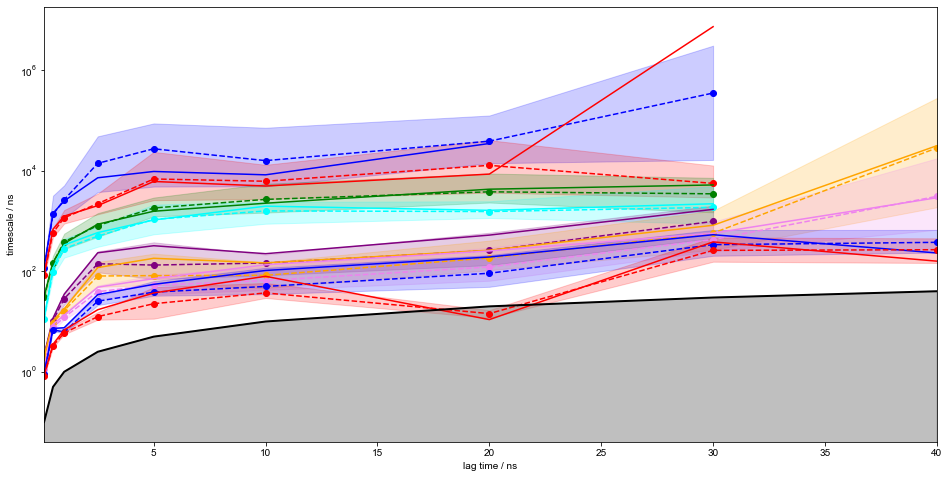

In [9]:
fig, ax = plt.subplots(figsize=(16, 8))

pyemma.plots.plot_implied_timescales(
    pyemma.msm.timescales_hmsm(cluster_500.dtrajs, 10, 
                               lags=[1,5,10,25,50,100,200,300,400,500,1000,2500, 5000,10000], 
                               errors='bayes', nsamples=50),
    units='ns', dt=0.1, ylog=True)

### HMSM construction and definition

In [10]:
hmsm = pyemma.msm.bayesian_hidden_markov_model(cluster_500.dtrajs, 5, lag=100, dt_traj='0.1 ns')


In [11]:
hmsm

BayesianHMSM(conf=0.95, connectivity=None, dt_traj='0.1 ns', init_hmsm=None,
       lag=100, mincount_connectivity=0.2, nsamples=100, nstates=5,
       observe_nonempty=True, p0_prior='mixed', reversible=True,
       separate=None, show_progress=True, stationary=False,
       store_hidden=False, stride=29, transition_matrix_prior='mixed')

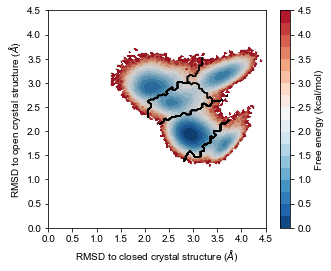

In [12]:
dtrajs_concatenated = np.concatenate(cluster_500.dtrajs)
metastable_traj = hmsm.metastable_assignments[dtrajs_concatenated]

black_cmap = ListedColormap(["k","k","k","k","k","k"])

diverging_colors = sns.color_palette("RdBu_r", 19)
sns_cmap = ListedColormap(diverging_colors[0:18])


fig, ax = plt.subplots(figsize=(5, 4))


pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
#     weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=100,
    kT=0.5825, legacy=False, alpha=1, cmap=sns_cmap,
#     vmin=0.0, vmax=5.0, 
    levels=19,
    cbar_label="Free energy (kcal/mol)"
)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat.T, metastable_traj, ax=ax, alpha=0.15, nbins=100, cbar=False,cmap=black_cmap)


ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set_aspect('equal')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))


In [13]:
len(hmsm.active_set)

5

/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/pyemma/msm/estimators/lagged_model_validators.py:454: RuntimeWarning: invalid value encountered in true_divide
  self.P0 /= self.P0.sum(axis=0)  # column-normalize


/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/msmtools/analysis/dense/decomposition.py:395: RuntimeWarning: divide by zero encountered in true_divide
  R = R / np.sqrt(s[np.newaxis, :])
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/msmtools/analysis/dense/decomposition.py:395: RuntimeWarning: invalid value encountered in true_divide
  R = R / np.sqrt(s[np.newaxis, :])
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/msmtools/analysis/dense/decomposition.py:396: RuntimeWarning: invalid value encountered in true_divide
  L = L / np.sqrt(s[np.newaxis, :])
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/pyemma/util/statistics.py:59: UserWarning: confidence interval for constant data is not meaningful
  warnings.warn('confidence interval for constant data is not meaningful')


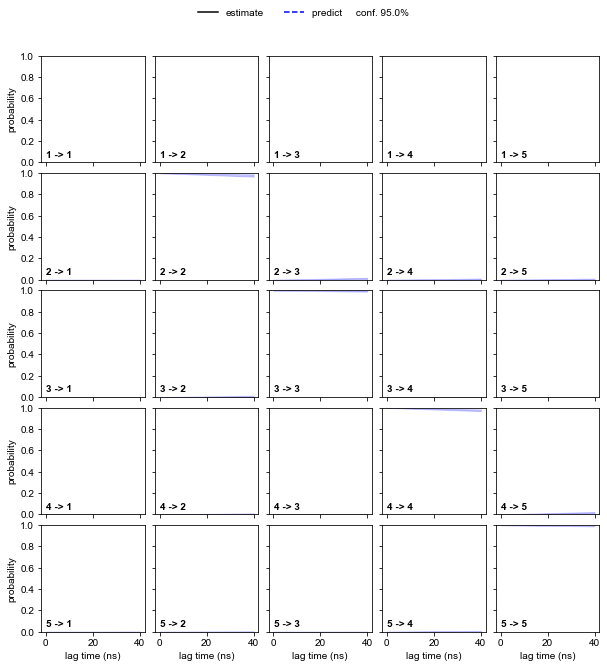

In [16]:
cktest_hmsm = hmsm.cktest(mlags=5, conf=0.95)

pyemma.plots.plot_cktest(cktest_hmsm, dt=0.1, units='ns');
plt.savefig('./plots/2-Without_IPA/test.png', dpi=600)

In [89]:
max(np.concatenate(cluster_500.dtrajs))

499

In [15]:
dtrajs_concatenated = np.concatenate(cluster_500.dtrajs)
metastable_traj = hmsm.metastable_assignments[dtrajs_concatenated]

black_cmap = ListedColormap(["k","k","k","k","k","k"])

diverging_colors = sns.color_palette("RdBu_r", 19)
sns_cmap = ListedColormap(diverging_colors[0:18])


fig, ax = plt.subplots(figsize=(5, 4))


pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
#     weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=100,
    kT=0.5825, legacy=False, alpha=1, cmap=sns_cmap,
#     vmin=0.0, vmax=5.0, 
    levels=19,
    cbar_label="Free energy (kcal/mol)"
)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat.T, metastable_traj, ax=ax, alpha=0.15, nbins=100, cbar=False,cmap=black_cmap)


ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set_aspect('equal')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))
plt.tight_layout()

IndexError: index 496 is out of bounds for axis 0 with size 496

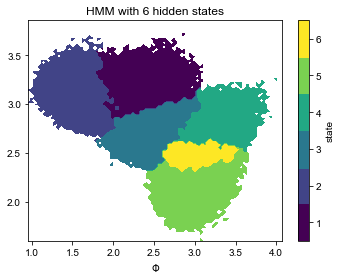

In [26]:
dtrajs_concatenated = np.concatenate(cluster_500.dtrajs)

fig, ax = plt.subplots(figsize=(5, 4))

_, _, misc = pyemma.plots.plot_state_map(*Y_concat.T, hmsm.metastable_assignments[dtrajs_concatenated], ax=ax)

ax.set_title('HMM with {} hidden states'.format(hmsm.nstates))
ax.set_xlabel('$\Phi$')
misc['cbar'].set_ticklabels(range(1, hmsm.nstates + 1))


fig.tight_layout()

## ML HMSM

### ITS

23-10-20 15:29:41 pyemma.msm.estimators.maximum_likelihood_hmsm.MaximumLikelihoodHMSM[6] WARNING  Ignored error during estimation: Input matrix is not weakly connected. Therefore it has no unique stationary distribution. Separate disconnected components and handle them separately
23-10-20 16:12:47 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[4] WARNING  Estimation has failed at lagtimes: [5000]. Details:
['Error at lag time 5000: Input matrix is not weakly connected. Therefore it '
 'has no unique stationary distribution. Separate disconnected components and '
 'handle them separately']
23-10-20 16:12:47 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[4] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/msmtools/analysis/dense/decomposition.py:554: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


<AxesSubplot:xlabel='lag time / ns', ylabel='timescale / ns'>

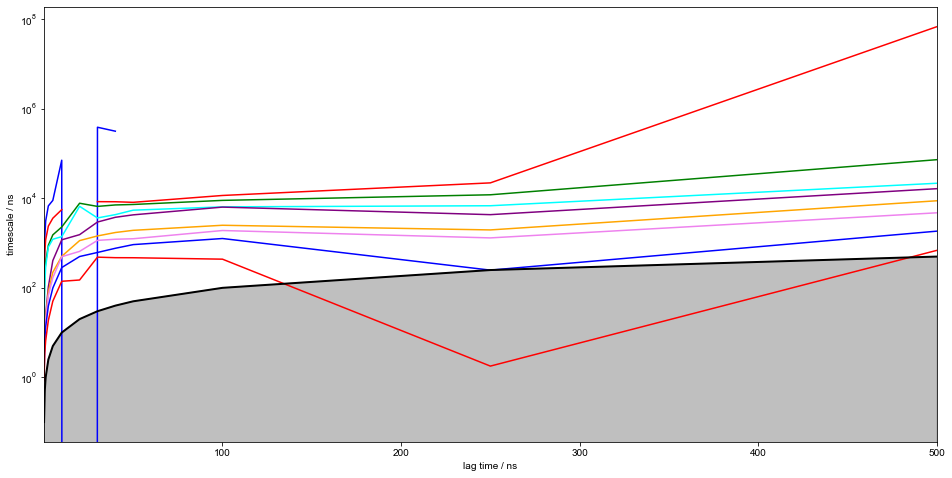

In [9]:
fig, ax = plt.subplots(figsize=(16, 8))

pyemma.plots.plot_implied_timescales(
    pyemma.msm.timescales_hmsm(cluster_500.dtrajs, 10, 
                               lags=[1,5,10,25,50,100,200,300,400,500,1000,2500, 5000,10000], 
                               errors=None, nsamples=50),
    units='ns', dt=0.1, ylog=True)

<AxesSubplot:xlabel='lag time / ns', ylabel='timescale / ns'>

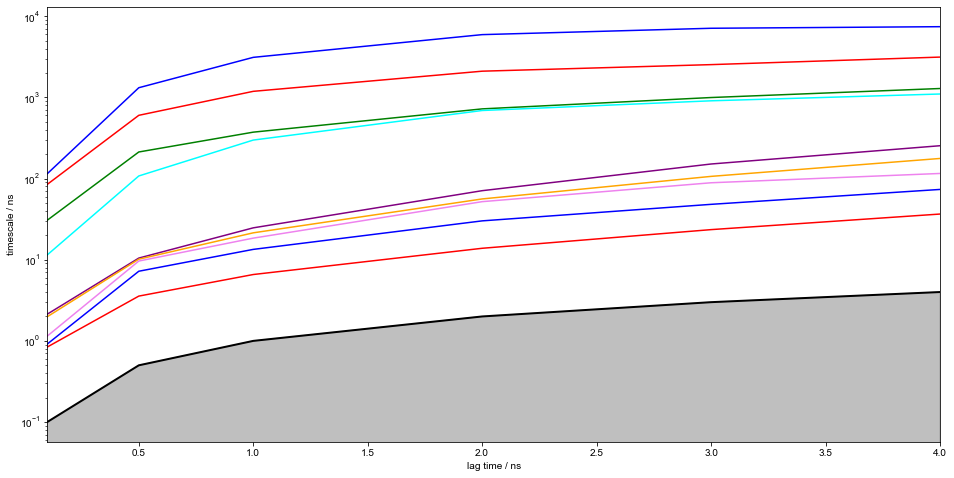

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))

pyemma.plots.plot_implied_timescales(
    pyemma.msm.timescales_hmsm(cluster_500.dtrajs, 10, 
                               lags=[1,5,10,20,30,40,50,100,200,300,400], 
                               errors=None, nsamples=50),
    units='ns', dt=0.1, ylog=True)

<AxesSubplot:xlabel='lag time / ns', ylabel='timescale / ns'>

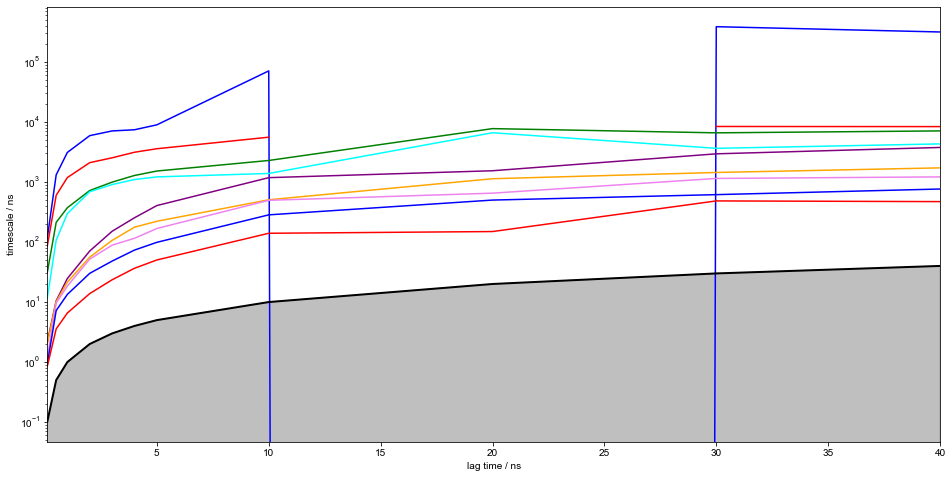

In [11]:
fig, ax = plt.subplots(figsize=(16, 8))

pyemma.plots.plot_implied_timescales(
    pyemma.msm.timescales_hmsm(cluster_500.dtrajs, 10, 
                               lags=[1,5,10,20,30,40,50,100,200,300,400], 
                               errors=None, nsamples=50),
    units='ns', dt=0.1, ylog=True)

In [35]:
msm_500_6000 = pyemma.msm.bayesian_markov_model(cluster_500.dtrajs, lag=6000, dt_traj='0.1 ns')

fraction of states used = 1.00
fraction of counts used = 1.00


In [51]:
msm_500_1500 = pyemma.msm.bayesian_markov_model(cluster_500.dtrajs, lag=1500, dt_traj='0.1 ns')

fraction of states used = 1.00
fraction of counts used = 1.00


In [13]:
msm_500_100 = pyemma.msm.bayesian_markov_model(cluster_500.dtrajs, lag=100, dt_traj='0.1 ns')


AttributeError: 'KmeansClustering' object has no attribute '_default_chunksize'

In [52]:
with open('./pickled/2-Without_IPA/1_msm_500_300.pickle', 'wb') as outf:
    pickle.dump(msm_500_300, outf)
    
with open('./pickled/2-Without_IPA/1_msm_500_600.pickle', 'wb') as outf:
    pickle.dump(msm_500_600, outf)
    
with open('./pickled/2-Without_IPA/1_msm_500_6000.pickle', 'wb') as outf:
    pickle.dump(msm_500_6000, outf)
    
with open('./pickled/2-Without_IPA/1_msm_500_1500.pickle', 'wb') as outf:
    pickle.dump(msm_500_1500, outf)
    
# with open('./pickled/2-Without_IPA/1_msm_500_300.pickle', 'rb') as inf:
#     msm_500_300 = pickle.load(inf)

# with open('./pickled/2-Without_IPA/1_msm_500_600.pickle', 'rb') as inf:
#     msm_500_600 = pickle.load(inf)

# with open('./pickled/2-Without_IPA/1_msm_500_6000.pickle', 'rb') as inf:
#     msm_500_6000 = pickle.load(inf)

# with open('./pickled/2-Without_IPA/1_msm_500_1500.pickle', 'rb') as inf:
#     msm_500_1500 = pickle.load(inf)

Text(0, 0.5, 'timescale separation')

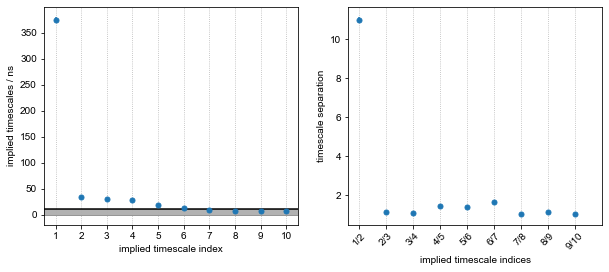

In [66]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)

msm=msm_500_100
nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits )],rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')

Text(0, 0.5, 'timescale separation')

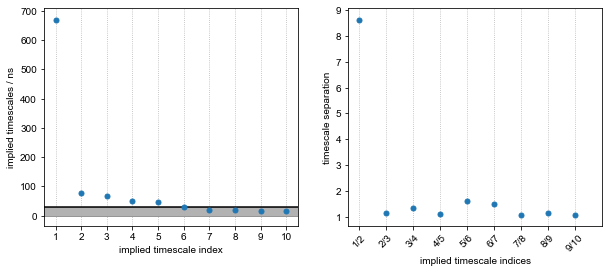

In [47]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)

msm=msm_500_300
nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits )],rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')

# fig.savefig('./plots/2-Without_IPA/9_its_separation.png', dpi=600)

Text(0, 0.5, 'timescale separation')

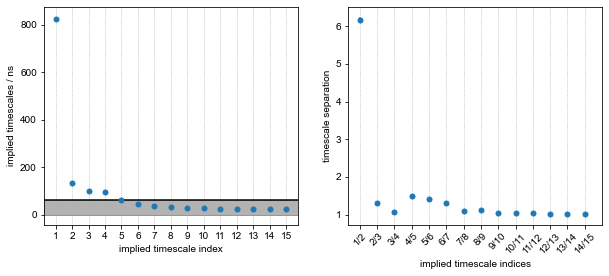

In [48]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)

msm=msm_500_600
nits = 15

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits)],rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')

# fig.savefig('./plots/2-Without_IPA/9_its_separation.png', dpi=600)

Text(0, 0.5, 'timescale separation')

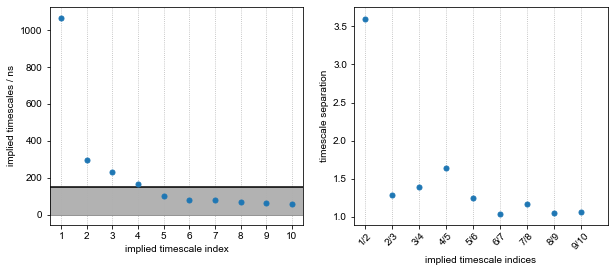

In [53]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)

msm=msm_500_1500
nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits)],rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')

# fig.savefig('./plots/2-Without_IPA/9_its_separation.png', dpi=600)

Text(0, 0.5, 'timescale separation')

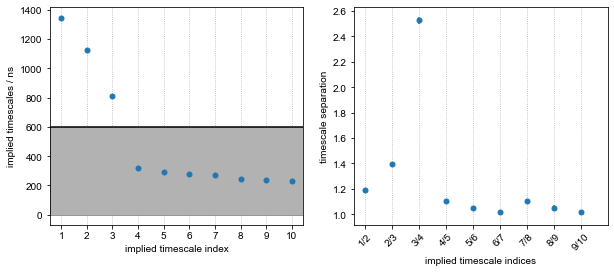

In [50]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)

msm=msm_500_6000
nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits)],rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')

# fig.savefig('./plots/2-Without_IPA/9_its_separation.png', dpi=600)

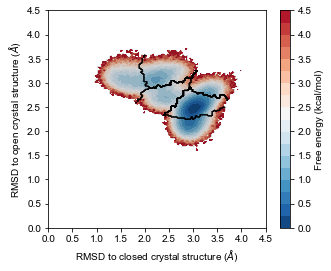

In [67]:
msm=msm_500_100
nstates=6
msm.pcca(nstates)

dtrajs_concatenated = np.concatenate(cluster_500.dtrajs)
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

black_cmap = ListedColormap(["k","k","k","k","k","k"])

diverging_colors = sns.color_palette("RdBu_r", 19)
sns_cmap = ListedColormap(diverging_colors[0:18])


fig, ax = plt.subplots(figsize=(5, 4))


pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
#     weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=100,
    kT=0.5825, legacy=False, alpha=1, cmap=sns_cmap,
#     vmin=0.0, vmax=5.0, 
    levels=19,
    cbar_label="Free energy (kcal/mol)"
)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat.T, metastable_traj, ax=ax, alpha=0.15, nbins=100, cbar=False,cmap=black_cmap)


ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set_aspect('equal')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

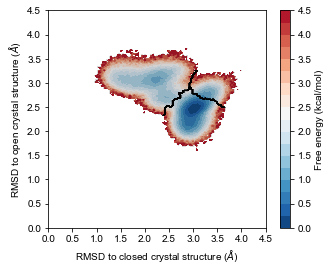

In [56]:
msm=msm_500_6000
nstates=3
msm.pcca(nstates)

dtrajs_concatenated = np.concatenate(cluster_500.dtrajs)
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

black_cmap = ListedColormap(["k","k","k","k","k","k"])

diverging_colors = sns.color_palette("RdBu_r", 19)
sns_cmap = ListedColormap(diverging_colors[0:18])


fig, ax = plt.subplots(figsize=(5, 4))


pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
#     weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=100,
    kT=0.5825, legacy=False, alpha=1, cmap=sns_cmap,
#     vmin=0.0, vmax=5.0, 
    levels=19,
    cbar_label="Free energy (kcal/mol)"
)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat.T, metastable_traj, ax=ax, alpha=0.15, nbins=100, cbar=False,cmap=black_cmap)


ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set_aspect('equal')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

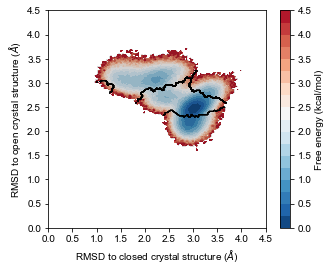

In [77]:
msm=msm_500_1500
nstates=4
msm.pcca(nstates)

dtrajs_concatenated = np.concatenate(cluster_500.dtrajs)
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

black_cmap = ListedColormap(["k","k","k","k","k","k"])

diverging_colors = sns.color_palette("RdBu_r", 19)
sns_cmap = ListedColormap(diverging_colors[0:18])


fig, ax = plt.subplots(figsize=(5, 4))


pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
#     weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=100,
    kT=0.5825, legacy=False, alpha=1, cmap=sns_cmap,
#     vmin=0.0, vmax=5.0, 
    levels=19,
    cbar_label="Free energy (kcal/mol)"
)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat.T, metastable_traj, ax=ax, alpha=0.15, nbins=100, cbar=False,cmap=black_cmap)


ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set_aspect('equal')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

In [68]:
msm=msm_500_100
nstates=6
cktest6 = msm.cktest(nstates)



In [69]:
with open('./pickled/2-Without_IPA/1_msm_500_100_cktest6.pickle', 'wb') as outf:
    pickle.dump(cktest6, outf)

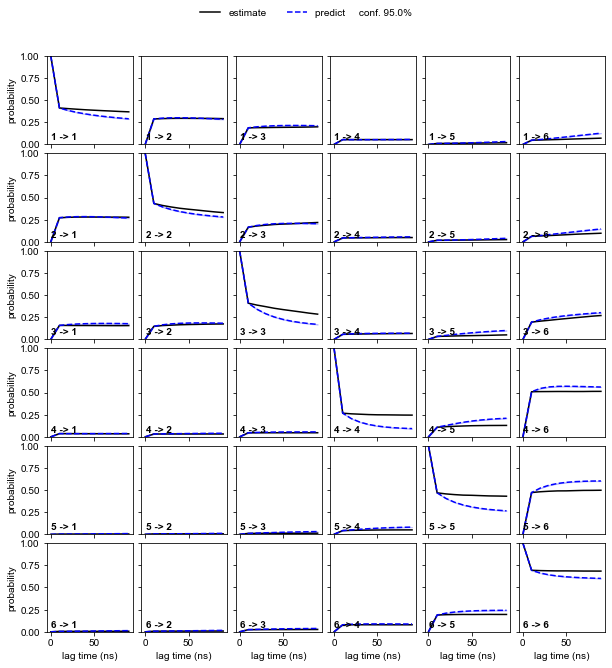

In [70]:
pyemma.plots.plot_cktest(cktest6, dt=0.1, units='ns');

Exception in thread Thread-45:
Traceback (most recent call last):
  File "/home/el14718/Software/anaconda3_2019/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/home/el14718/Software/anaconda3_2019/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/multiprocess/pool.py", line 486, in _handle_results
    cache[job]._set(i, obj)
  File "/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/multiprocess/pool.py", line 662, in _set
    self._callback(self._value)
  File "/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/pyemma/_base/estimator.py", line 319, in <lambda>
    callback = lambda _: progress_reporter._progress_update(1, stage='param-scan')
  File "/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/pyemma/_base/progress/reporter/__init__.py", line 176, in _progress_update
    self.__check_st

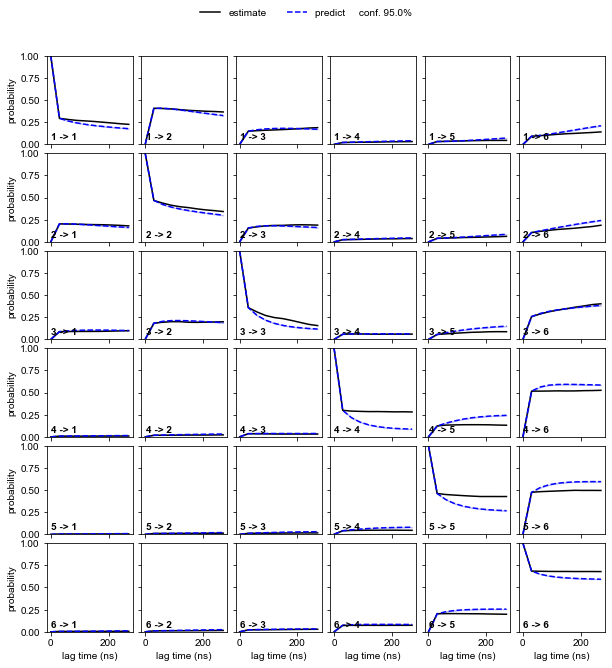

In [75]:
msm=msm_500_300
nstates=6
cktest_msm_500_300_6 = msm.cktest(nstates)

with open('./pickled/2-Without_IPA/1_cktest_msm_500_300_6.pickle', 'wb') as outf:
    pickle.dump(cktest_msm_500_300_6, outf)

    pyemma.plots.plot_cktest(cktest_msm_500_300_6, dt=0.1, units='ns');

13-10-20 17:12:37 pyemma.msm.estimators.lagged_model_validators.ChapmanKolmogorovValidator[29] WARNING  Changed mlags as some mlags exceeded maximum trajectory length.


/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/msmtools/analysis/api.py:367: UserWarning: truncated eigendecomposition to contain 498 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/msmtools/analysis/api.py:367: UserWarning: truncated eigendecomposition to contain 490 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/msmtools/analysis/api.py:367: UserWarning: truncated eigendecomposition to contain 209 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)


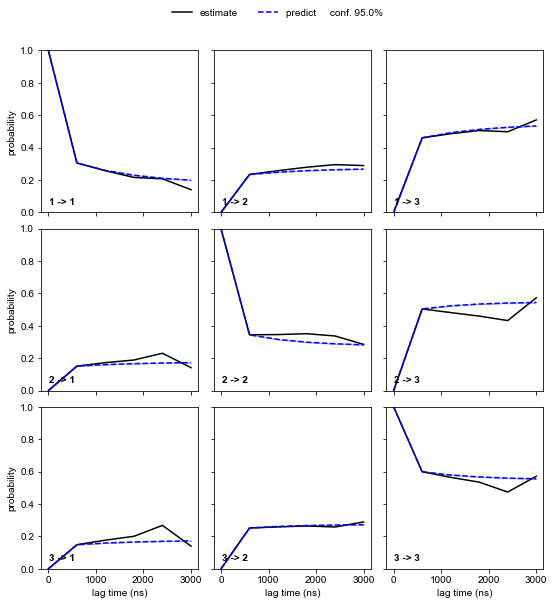

In [76]:
msm=msm_500_6000
nstates=3
cktest_msm_500_6000_3 = msm.cktest(nstates)

with open('./pickled/2-Without_IPA/1_cktest_msm_500_6000_3.pickle', 'wb') as outf:
    pickle.dump(cktest_msm_500_6000_3, outf)

    pyemma.plots.plot_cktest(cktest_msm_500_6000_3, dt=0.1, units='ns');

/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/msmtools/analysis/api.py:367: UserWarning: truncated eigendecomposition to contain 499 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/msmtools/analysis/api.py:367: UserWarning: truncated eigendecomposition to contain 498 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)


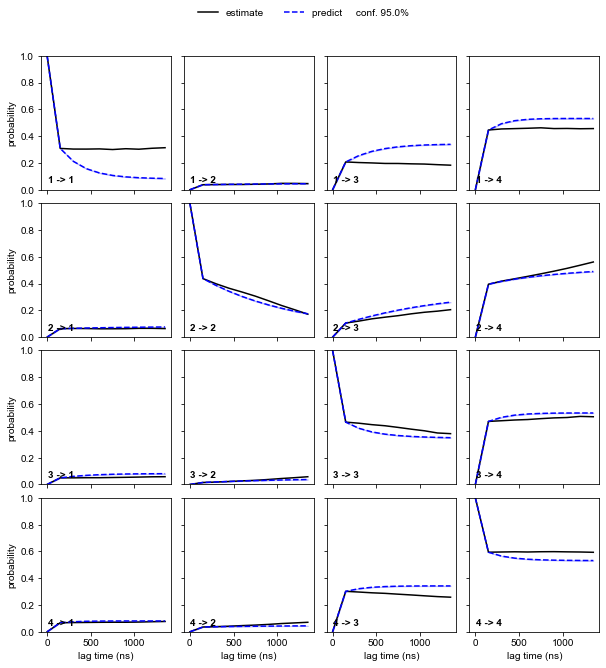

In [78]:
msm=msm_500_1500
nstates=4
cktest_msm_500_1500_3 = msm.cktest(nstates)

with open('./pickled/2-Without_IPA/1_cktest_msm_500_1500_3.pickle', 'wb') as outf:
    pickle.dump(cktest_msm_500_1500_3, outf)

    pyemma.plots.plot_cktest(cktest_msm_500_1500_3, dt=0.1, units='ns');

In [ ]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 2)],
    rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')

fig.savefig('./plots/2-Without_IPA/9_its_separation.png', dpi=600)

In [ ]:
eigvec = msm.eigenvectors_right()
print('The first eigenvector is one: {} (min={}, max={})'.format(
    np.allclose(eigvec[:, 0], 1, atol=1e-15), eigvec[:, 0].min(), eigvec[:, 0].max()))

fig, axes = plt.subplots(2, 4, figsize=(15, 6), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *Y_concat[:, :2].T,
        eigvec[dtrajs_concatenated, i + 1],
        ax=ax,
        cmap='PiYG',
        cbar_label='{}. right eigenvector'.format(i + 2),
        mask=True)
    
    ax.set_xlim(0,4.5)
    ax.set_xticks(np.arange(0, 5, 0.5))
    ax.set_aspect('equal')

axes[1,0].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[1,1].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[1,2].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[1,3].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[0,0].set_ylim(0,4.5)
axes[0,0].set_yticks(np.arange(0, 5, 0.5))
axes[0,0].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[1,0].set_ylim(0,4.5)
axes[1,0].set_yticks(np.arange(0, 5, 0.5))
axes[1,0].set_ylabel(r'RMSD to open crystal structure ($\AA$)')

# fig.tight_layout()
fig.savefig('./plots/2-Without_IPA/10_eigenvectors.png', dpi=600)

## PCCA metastable states

In [21]:
nstates=6
msm.pcca(nstates)

dtrajs_concatenated = np.concatenate(cluster.dtrajs)
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

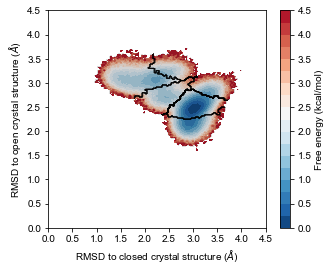

In [38]:
black_cmap = ListedColormap(["k","k","k","k","k","k"])

diverging_colors = sns.color_palette("RdBu_r", 19)
sns_cmap = ListedColormap(diverging_colors[0:18])


fig, ax = plt.subplots(figsize=(5, 4))


pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
#     weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=100,
    kT=0.5825, legacy=False, alpha=1, cmap=sns_cmap,
#     vmin=0.0, vmax=5.0, 
    levels=19,
    cbar_label="Free energy (kcal/mol)"
)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat.T, metastable_traj, ax=ax, alpha=0.15, nbins=100, cbar=False,cmap=black_cmap)


ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set_aspect('equal')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.savefig('./plots/2-Without_IPA/11_metastable_state_bondaries.png', dpi=600)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=False)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat[:, :2].T, metastable_traj, ax=axes[0], zorder=-1, nbins=100)

misc['cbar'].set_ticklabels(range(1, nstates + 1))  # set state numbers 1 ... nstates

pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1], nbins=100,
    kT=0.5825, legacy=False,
#     vmin=0.0, vmax=5.0, levels=100,
    cbar_label="Free energy (kcal/mol)"
)

axes[0].set_title('Metastable states', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')

axes[0].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[0].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[0].set(xlim=(0,4.5) , ylim=(0, 4.5))
axes[0].set_xticks(np.arange(0, 5, 0.5))
axes[0].set_yticks(np.arange(0, 5, 0.5))

axes[1].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[1].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[1].set(xlim=(0,4.5) , ylim=(0, 4.5))
axes[1].set_xticks(np.arange(0, 5, 0.5))
axes[1].set_yticks(np.arange(0, 5, 0.5))


axes[0].set_aspect('equal')
axes[1].set_aspect('equal')


# fig.savefig('./plots/12_metastable_states.png', dpi=600)

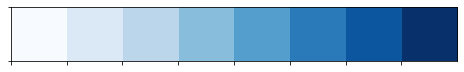

In [37]:
hexlist=[]

cmap = cm.get_cmap("Blues",8)    # PiYG

for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    hexlist.append(matplotlib.colors.rgb2hex(rgb))
sns.set_palette(hexlist)
sns.palplot(sns.color_palette())
# my_cmap=[hexlist[2],hexlist[1],hexlist[3],hexlist[4],hexlist[6],hexlist[5]]
my_cmap=ListedColormap([hexlist[3],hexlist[2],hexlist[4],hexlist[5],hexlist[7],hexlist[6]])

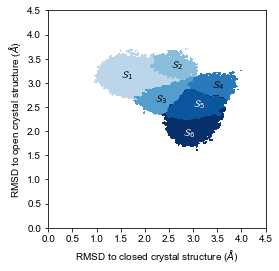

In [25]:
fig, ax = plt.subplots(figsize=(5, 4))

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat[:, :2].T, metastable_traj, ax=ax, 
    cmap=my_cmap, cbar=False,
    zorder=-1, nbins=100)

# misc['cbar'].set_ticklabels(range(1, nstates + 1))  # set state numbers 1 ... nstates

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))
ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))
ax.set_aspect('equal')

ax.text(1.5,3.1,r'$\mathcal{S}_1$',c='k')
ax.text(2.55,3.3,r'$\mathcal{S}_2$',c='k')
ax.text(2.2,2.6,r'$\mathcal{S}_3$',c='k')
ax.text(3.4,2.9,r'$\mathcal{S}_4$',c='k')
ax.text(3.,2.5,r'$\mathcal{S}_5$',c='w' )
ax.text(2.8,1.9,r'$\mathcal{S}_6$',c='w' )

fig.savefig('./plots/2-Without_IPA/12_metastable_states.png', dpi=600)

In [ ]:
pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 1000)

In [ ]:
traj_source = pyemma.coordinates.source(traj_list, top=topfile, stride=1)
pyemma.coordinates.save_trajs(
    traj_source,
    pcca_samples,
    outfiles=['./sample_structures/2-Without_IPA/1-MSM_1000_samples/pcca{}_samples.xtc'.format(n + 1)
              for n in range(msm.n_metastable)])

### Position metastable samples 

In [ ]:
indir_sample = './sample_structures/2-Without_IPA/1-MSM_1000_samples'
traj_list_sample = sorted(glob(indir_sample+'/*.xtc'))
traj_list_sample

In [ ]:
results_open_sample=[]
results_closed_sample=[]
for t in traj_list_sample:
    traj=pt.load(t, topfile, stride=1)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_sample.append(rmsd_closed)
    
    rmsd_open=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_sample.append(rmsd_open)

In [ ]:
rmsd_open_sample=np.concatenate(results_open_sample, axis=0)
rmsd_closed_sample=np.concatenate(results_closed_sample, axis=0)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
    weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=100,
    kT=0.5825, 
    cbar=False
)

ax.plot(rmsd_closed_sample, rmsd_open_sample, linewidth=0, marker='o', markersize=0.5, color='white')

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set_aspect('equal')

fig.savefig('./plots/1-With_IPA/13_sample_structures.png', dpi=600)

## MFPT

In [28]:
p=[]
print('state\tπ\tΔG(kcal/mol)')
for i, s in enumerate(msm.metastable_sets):
    p.append(msm.pi[s].sum())
    
labels=[2,1,3,4,6,5]
for j in range(0,6):

    print('{}\t{:.3f}\t{:.3f}'.format(labels[j],p[j], (-0.5825*np.log(p[j])+0.5825*np.log(p[5]))))


state	π	ΔG(kcal/mol)
2	0.018	2.067
1	0.074	1.241
3	0.040	1.599
4	0.053	1.436
6	0.196	0.672
5	0.620	0.000


In [33]:
from itertools import product

mfpt = np.zeros((nstates, nstates))
for i, j in product(range(nstates), repeat=2):
    mfpt[i, j] = msm.mfpt(
        msm.metastable_sets[i],
        msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / μs:')
DataFrame(np.round(mfpt/1000, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / μs:


,1,2,3,4,5,6
1,0.00,0.20,0.73,1.97,1.29,0.87
2,3.46,0.00,0.69,1.91,1.22,0.81
3,6.42,2.95,0.00,1.62,0.94,0.51
4,9.87,6.35,3.53,0.00,0.48,0.09
5,10.03,6.52,3.70,1.34,0.00,0.09
6,9.95,6.43,3.60,1.24,0.39,0.00


Already in ns because msm was created with option `dt_traj='0.1 ns'`

In [34]:
inverse_mfpt = np.zeros_like(mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]

metastable_traj = msm.metastable_assignments[dtrajs_concatenated]
highest_membership = msm.metastable_distributions.argmax(1)
coarse_state_centers = cluster.clustercenters[msm.active_set[highest_membership]]

In [17]:
stat_dist=[]
for i, s in enumerate(msm.metastable_sets):
    stat_dist.append(msm.pi[s].sum())
print(np.array(stat_dist))

[0.01785633 0.07371517 0.03986538 0.05269302 0.19561282 0.62025729]


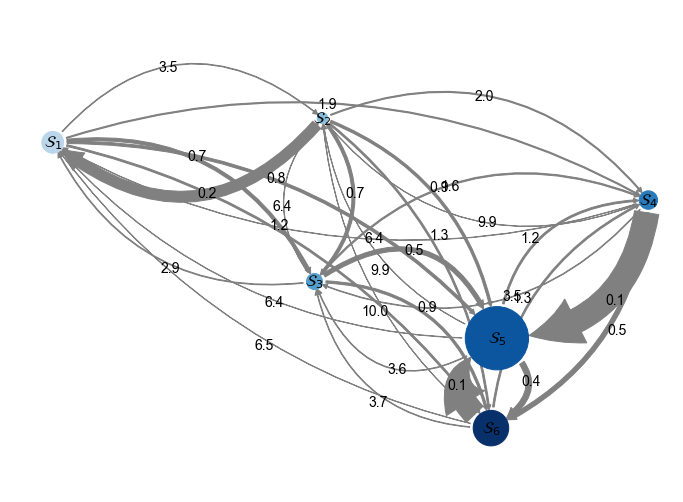

In [19]:
fig, ax = plt.subplots(figsize=(12, 12))

pyemma.plots.plot_network(
    inverse_mfpt,
    pos=coarse_state_centers,
    figpadding=0,
    arrow_label_format='%.1f',
    arrow_labels=mfpt/1000,
    size=16,
    state_colors=[hexlist[3],hexlist[2],hexlist[4],hexlist[5],hexlist[7],hexlist[6]],
    state_labels=[r'$\mathcal{S}_2$',r'$\mathcal{S}_1$',r'$\mathcal{S}_3$',
                  r'$\mathcal{S}_4$',r'$\mathcal{S}_6$',r'$\mathcal{S}_5$'],
    state_sizes=np.array(stat_dist),
    arrow_scale=6.0, arrow_curvature=3,
    show_frame=False,
    arrow_label_size=14,
    fontweight='bold',
    ax=ax)

# ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
# ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set(xlim=(1.5,3.5) , ylim=(2.0,3.25))
# ax.set_xticks(np.arange(2, 4.5, 0.5))
# ax.set_yticks(np.arange(1.5, 4, 0.5))
ax.set_aspect('equal')

fig.savefig('./plots/2-Without_IPA/14_MFPT.png', dpi=600)